In [71]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

### **About Data**

You can find [Dataset](https://www.kaggle.com/datasets/saadharoon27/hotel-booking-dataset) on kaggle.

In [72]:
raw_data = pd.read_csv("../artifacts/data_ingestion/hotel_cancellation.csv")
raw_data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734


In [73]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [74]:
"""no.of columns, rows"""
raw_data.shape 

(119390, 36)

In [75]:
"""numerical columns"""
numerical_variables = raw_data.select_dtypes("number")
print(f"Numerical Variable shape: {numerical_variables.shape}")
numerical_variables.sample(3)

Numerical Variable shape: (119390, 20)


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
100856,0,8,2016,45,2,0,1,2,0.0,0,0,0,0,0,9.0,NaN,0,120.00,0,2
24071,0,107,2016,19,5,2,5,2,0.0,0,0,0,0,0,243.0,NaN,0,48.18,0,0
10743,1,27,2017,13,31,0,2,2,0.0,0,0,0,0,0,240.0,NaN,0,70.00,0,1


In [76]:
"""categorical columns"""
categorical_variables = raw_data.select_dtypes("O")
print(f"Categorical Variable shape: {categorical_variables.shape}")
categorical_variables.sample(3)

Categorical Variable shape: (119390, 16)


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
115490,City Hotel,July,BB,DEU,Online TA,TA/TO,G,G,No Deposit,Transient,Check-Out,2017-07-07,Joshua Dominguez,Joshua.Dominguez78@hotmail.com,426-322-3010,************7441
111201,City Hotel,May,BB,FRA,Groups,TA/TO,A,A,No Deposit,Transient-Party,Check-Out,2017-05-08,Gavin King,Gavin.K@hotmail.com,177-155-7360,************5833
66094,City Hotel,April,BB,BRA,Online TA,TA/TO,E,E,No Deposit,Transient,Canceled,2017-03-25,Michele Rogers,Rogers_Michele@xfinity.com,914-153-5544,************9341


## **Target Variable**

In [77]:
TARGET_VARIABLE = raw_data["is_canceled"]

is_canceled
0    75166
1    44224
Name: count, dtype: int64


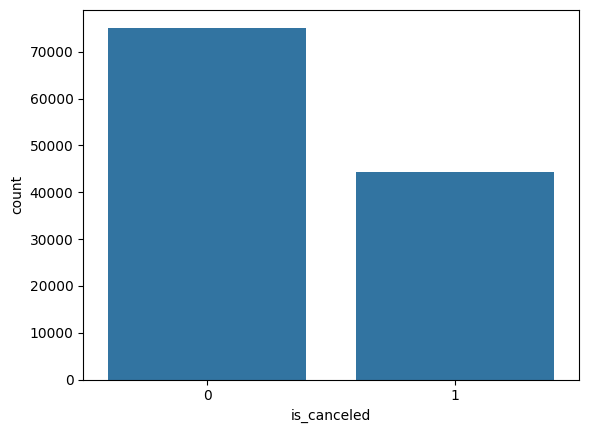

In [78]:
"""target variable value count"""
print(TARGET_VARIABLE.value_counts())
sn.barplot(TARGET_VARIABLE.value_counts())
plt.show()

## **Numerical Columns Distributions**

In [79]:
numerical_variables.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,NaN,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,NaN,0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,NaN,NaN,0,75.0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,NaN,0,75.0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,NaN,0,98.0,0,1


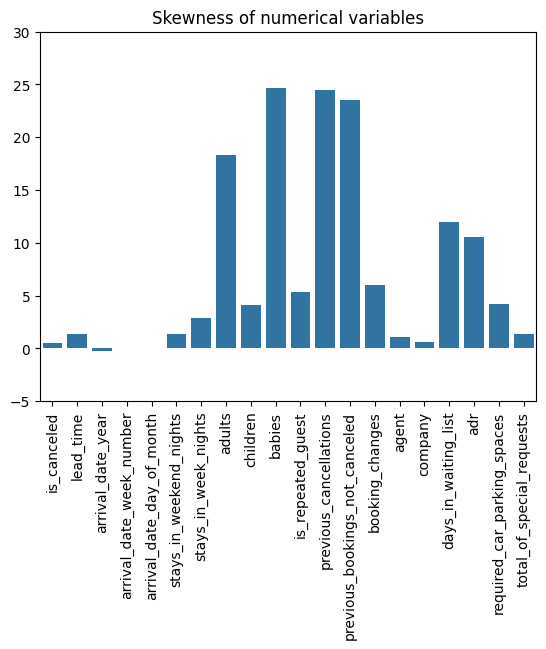

In [80]:
skewness = numerical_variables.skew()
sn.barplot(skewness)
plt.title("Skewness of numerical variables")
plt.ylim(-5, 30)
plt.xticks(rotation=90)
plt.show()

## ***Thougts***
- `TARGET_VARIABLE` have unbalanace class order. (Better to do Undersampling)